# KNN exercise with NBA player data

## Introduction

- NBA player statistics from 2014-2015 (partial season): [data](https://github.com/justmarkham/DAT4-students/blob/master/kerry/Final/NBA_players_2015.csv), [data dictionary](https://github.com/justmarkham/DAT-project-examples/blob/master/pdf/nba_paper.pdf)
- **Goal:** Predict player position using assists, steals, blocks, turnovers, and personal fouls

## Step 1: Read the data into Pandas

In [1]:
# read the data into a DataFrame
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT4-students/master/kerry/Final/NBA_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [3]:
# examine the columns
print nba.shape
nba.head(3)

(478, 49)


,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,fga,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
1,2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2,2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6


In [4]:
# examine the pos column, how many of each?
nba.pos.value_counts()

G    200
F    199
C     79
Name: pos, dtype: int64

## Step 2: Create X and y

Use the following features: assists, steals, blocks, turnovers, personal fouls

In [5]:
# map positions to numbers
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

# a list of of the cols we care about
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']

In [6]:
# create feature matrix (X)
X = nba[feature_cols]

In [7]:
# create response vector (y)
y = nba.pos_num

## Step 3: Train a KNN model (K=5)

In [8]:
# import class
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# instantiate a KNN calssifier with K=5
knn = KNeighborsClassifier(n_neighbors=5)

In [10]:
# fit with data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

## Step 4: Predict player position and calculate predicted probability of each position

Predict for a player with these statistics: 1 assist, 1 steal, 0 blocks, 1 turnover, 2 personal fouls

In [11]:
# create a list to represent a player
player = [1, 1, 0, 1, 2]

In [12]:
# make a prediction with this new data point
knn.predict(player)

array([2])

In [13]:
# calculate predicted probabilities for each type
knn.predict_proba(player)

array([[ 0. ,  0.2,  0.8]])

## Step 5: Repeat steps 3 and 4 using K=50

In [14]:
# repeat for K=50
knn50 = KNeighborsClassifier(n_neighbors=50)

In [16]:
knn50.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=50, p=2, weights='uniform')

In [19]:
# calculate predicted probabilities
knn50.predict_proba(X)

array([[ 0.2 ,  0.62,  0.18],
       [ 0.14,  0.62,  0.24],
       [ 0.56,  0.4 ,  0.04],
       ..., 
       [ 0.02,  0.44,  0.54],
       [ 0.24,  0.66,  0.1 ],
       [ 0.34,  0.58,  0.08]])

In [20]:
knn50.predict_proba(player)

array([[ 0.06,  0.62,  0.32]])

## Bonus: Explore the features to decide which ones are predictive

In [24]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [34]:
# description of assists grouped by position
nba.groupby('pos_num').ast.describe()

pos_num       
0        count     79.000000
         mean       0.945570
         std        0.858263
         min        0.000000
         25%        0.400000
         50%        0.800000
         75%        1.150000
         max        4.400000
1        count    199.000000
         mean       1.173367
         std        1.086252
         min        0.000000
         25%        0.450000
         50%        0.900000
         75%        1.500000
         max        7.300000
2        count    200.000000
         mean       2.729000
         std        2.128287
         min        0.000000
         25%        1.100000
         50%        2.250000
         75%        3.800000
         max       10.200000
dtype: float64

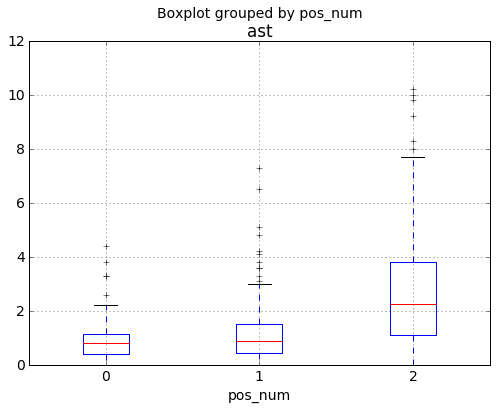

In [36]:
# box plot of assists grouped by position
nba.boxplot(column='ast', by='pos_num')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39fc419150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f39fc05bf50>]], dtype=object)

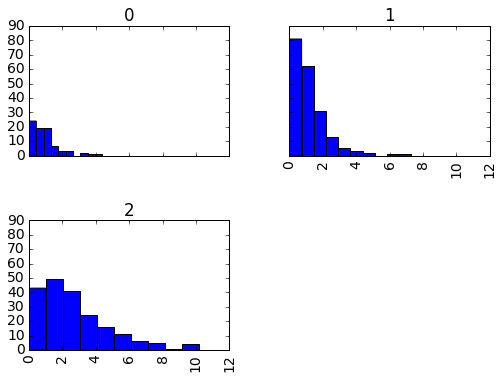

In [39]:
# histogram of assists grouped by position
nba.hist(column='ast', by='pos_num', sharex = True, sharey=True)

([array([ 37.,  25.,  10.,   3.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.]),
  array([ 72.,  66.,  36.,  10.,   6.,   3.,   2.,   2.,   0.,   1.,   1.,
           0.,   0.,   0.,   0.]),
  array([ 25.,  39.,  28.,  26.,  24.,  15.,  12.,  10.,   5.,   2.,   7.,
           2.,   1.,   1.,   3.])],
 array([  0.  ,   0.68,   1.36,   2.04,   2.72,   3.4 ,   4.08,   4.76,
          5.44,   6.12,   6.8 ,   7.48,   8.16,   8.84,   9.52,  10.2 ]),
 <a list of 3 Lists of Patches objects>)

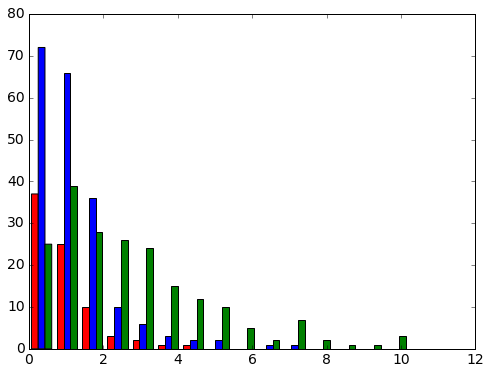

In [60]:
#plt.hist(d, color=['red','blue','green'], label='setosa    versicolor  virginica', bins=20)
d = [ nba[nba.pos_num==p].ast for p in set(nba.pos_num) ]
plt.hist(d, color=['red','blue','green'], label=['center','fwd','grd'], bins = 15)

** Did you find anything cool? ** 